In [2]:
# import libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the data
data = r'spam.csv'
df = pd.read_csv(data, sep=',', encoding='ISO-8859-1')

In [4]:
# Removing last two unnamed columns
df.drop(df.columns[-3:], axis=1, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df['v1'] = df['v1'].map({'ham' : 0, 'spam': 1})

In [10]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

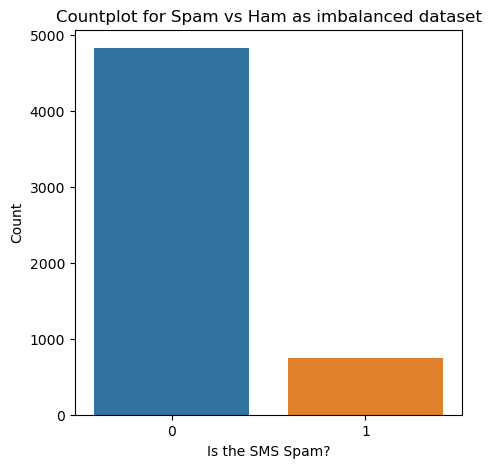

In [13]:
plt.figure(figsize=(5, 5))
p = sns.countplot(x='v1', data=df)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [14]:
# Handling imbalanced dataset using Oversampling 
only_spam = df[df['v1']  == 1]

In [15]:
only_spam

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
print('The number of Spam SMS : ',len(only_spam))
print('The number of Ham SMS : ', len(df) - len(only_spam))

The number of Spam SMS :  747
The number of Ham SMS :  4825


In [17]:
count = int((df.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [18]:
for i in range(0, count-1):
    df = pd.concat([df, only_spam])
df.shape

(9307, 2)

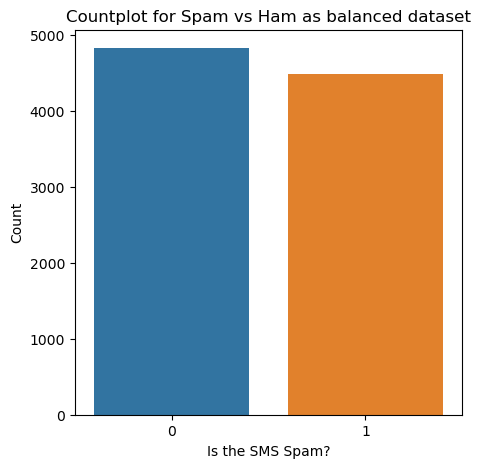

In [19]:
#Balance dataset
plt.figure(figsize=(5, 5))
p = sns.countplot(x='v1', data=df)
p = plt.title('Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [20]:
# Creating new feature word_count
df['word_count'] = df['v2'].apply(lambda x: len(x.split()))

In [21]:
df

,v1,v2,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


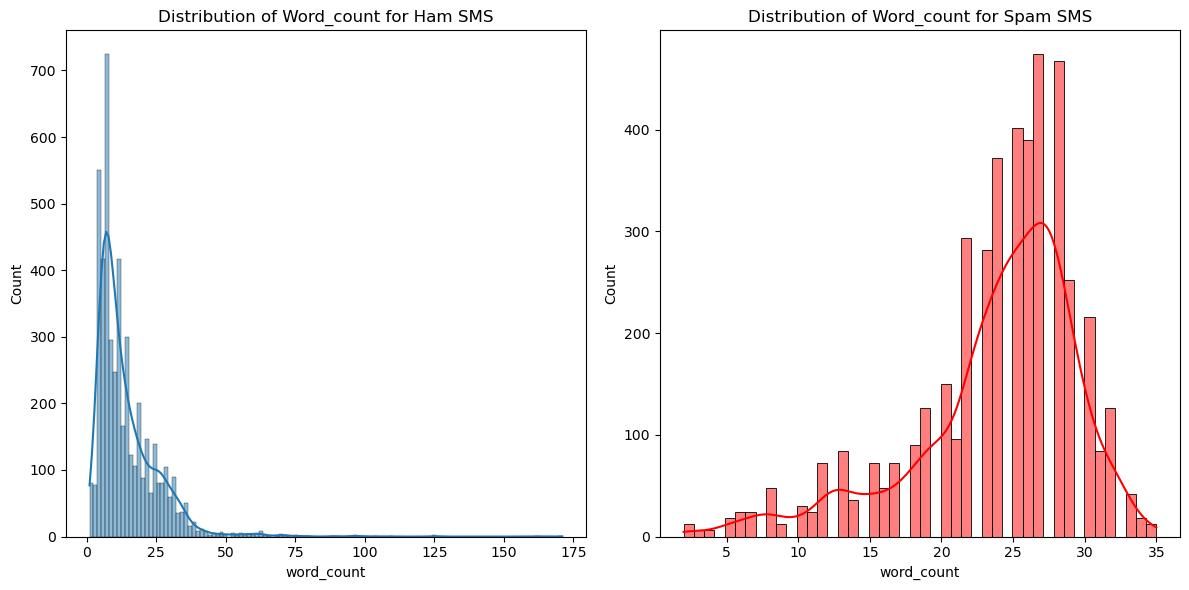

In [22]:
plt.figure(figsize=(12, 6))
# (1,1)
plt.subplot(1, 2, 1)
g = sns.histplot(df[df['v1'] == 0].word_count, kde=True)
p = plt.title('Distribution of Word_count for Ham SMS')

#(1,2)
plt.subplot(1, 2, 2)
g = sns.histplot(df[df['v1'] == 1].word_count, color = 'red' ,kde=True)
p = plt.title('Distribution of Word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [23]:
# Creating new feature of containing currency sumbol

def currency(data):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [24]:
df['Contains_Currency_Symbol'] = df['v2'].apply(currency)

In [25]:
df

,v1,v2,word_count,Contains_Currency_Symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


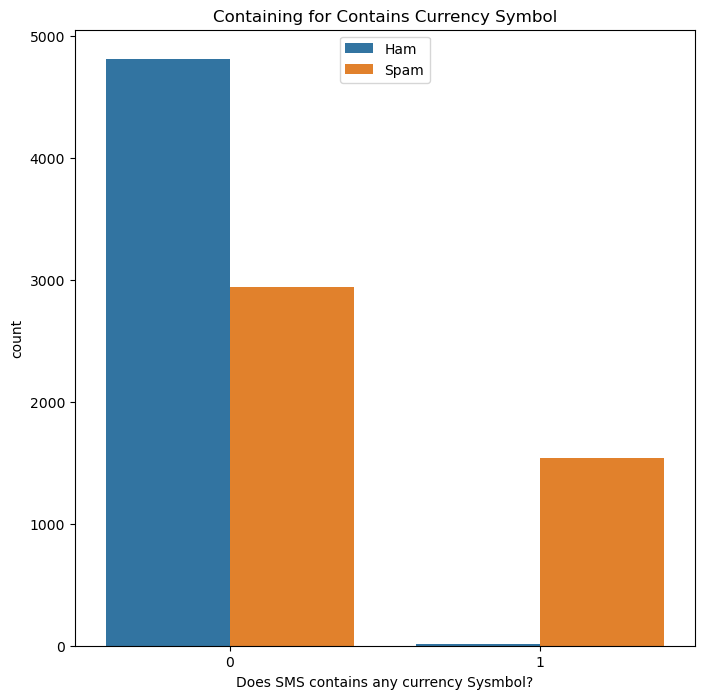

In [26]:
# Countplot for Contains_Currency_Symbol
plt.figure(figsize=(8, 8))
g = sns.countplot(x = 'Contains_Currency_Symbol', data = df , hue = 'v1')
p = plt.title("Containing for Contains Currency Symbol")
p = plt.xlabel('Does SMS contains any currency Sysmbol?')
p = plt.legend(labels=['Ham', 'Spam'], loc = 9)

In [27]:
# Creating new Fature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i)<= 57:
            return 1
    return 0

In [28]:
df['contain_number'] = df['v2'].apply(number)

In [29]:
df

,v1,v2,word_count,Contains_Currency_Symbol,contain_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


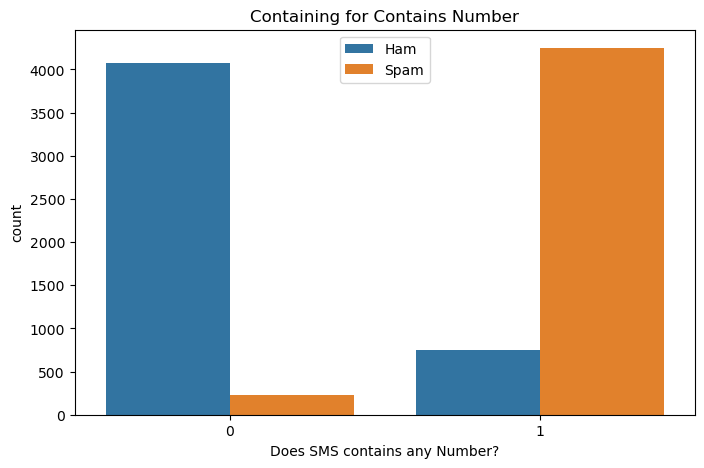

In [30]:
# Countplot for containing numbers
plt.figure(figsize=(8, 5))
g = sns.countplot(x = 'contain_number', data = df , hue = 'v1')
p = plt.title("Containing for Contains Number")
p = plt.xlabel('Does SMS contains any Number?')
p = plt.legend(labels=['Ham', 'Spam'], loc = 9)

In [31]:
# Data Cleaning
import nltk
import re
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(df.v2):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)  # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()  # Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]  
    lem_words = [wnl.lemmatize(word) for word in filtered_words]  
    message = ' '.join(filtered_words)  
    
    corpus.append(message)

In [33]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chances win cash pounds txt csh send cost p day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd po

In [34]:
# Creating the Bag of Words model (Term frequency Inverse document frequency (TFIDF) is a statistical formula to convert text documents into vectors based on the relevancy of the word. It is based on the bag of the words model to create a matrix containing the information about less relevant and most relevant words in the document.)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
vector = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out() 

In [35]:
x = pd.DataFrame(data=vector, columns=feature_names) 
y = df['v1']

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,ya,yeah,year,years,yes,yet,yo,yr,yrs,yup
3533,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Navie Bayes Model
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
cv = cross_val_score(mb, x, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.947
0.006


In [40]:
mb.fit(x_train, y_train)
y_pred = mb.predict(x_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[907,  51],
       [ 53, 851]], dtype=int64)

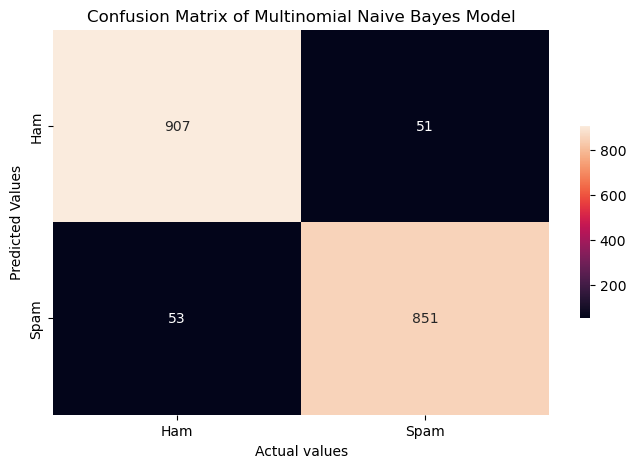

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
axis_labels = ['Ham', 'Spam']  
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt='g', cbar_kws={'shrink' : 0.5})
p = plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted Values')

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring='f1', cv=10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))

0.979
0.004


In [45]:
dt.fit(x_train, y_train)
y_pred =dt.predict(x_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[922,  36],
       [  4, 900]], dtype=int64)

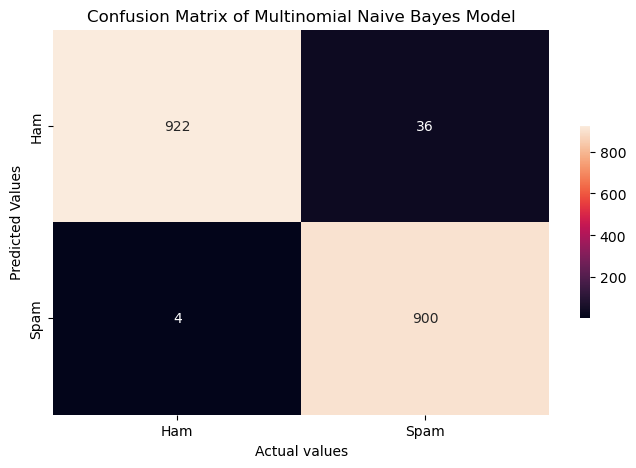

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
axis_labels = ['Ham', 'Spam']  
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt='g', cbar_kws={'shrink' : 0.5})
p = plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted Values')

In [49]:
def predict_Spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)  # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()  # Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]  
    lem_words = [wnl.lemmatize(word) for word in filtered_words]  
    message = ' '.join(filtered_words)  
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [50]:
#Predict 1 : Lottery text meassage
samp_message = "Congratulations! You've won a free vacation to an exotic destination! Claim your prize now by clicking on the link below."

if predict_Spam(samp_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('Gotcha! This is a SPAM message.')

Gotcha! This is a SPAM message.


C:\Users\Aditi\.jupyter\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
